In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy

# CMPS-3160 Final Project: How trends are changed on Steam? 
### Author: Bo Zhang, Tian Xie

https://dekuwang.github.io/

#### Background Information: 
Both Tian Xie and Bo Zhang are loyal Steam users, so we wanted to analyze how various games have evolved over time and how players' preferences have changed. Currently, we have selected a database of Steam games in Data World as of 2018, a dataset that contains information on all of Steam's games. This dataset includes game release dates, game genres, site names, developers, and some recommendations. Much of this data does not have a significant impact on the goals of our analysis. Therefore, we chose to narrow down the data types to game release dates, game genres, and whether multiplayer is supported. We believe that these data have a direct or indirect effect on the popularity of the game. In addition to this although the game genre is the same, there are innovations in gameplay. This factor also affects the popularity of the game genre. Therefore, if there is a significant change in the popularity of a certain genre, we will also explain the change in popularity in relation to the change in the genre in that year.

With this database, the first question we would like to ask is: what are the trends for each type of game? While a certain game genre has largely managed to become mainstream and most popular with users in every era. However, as technology improves and the way games are played changes. The situation where a certain game genre becomes mainstream in the long run will also change. Our current idea is to add up the number of recommendations for all games of the same genre in the same year, and then use a line graph to indicate the popularity of each game genre in that year. the Y-axis is set to the number of recommendations, and the X-axis is set to the year. If a game genre has changed in an unrecognizable way compared to the previous year, we consider this to be a case of a new game model or new technology emerging. With this one database, we can also determine what the most popular games are each year. By grouping games released in the same year into categories, we can find out what the most recommended games are and then analyze the genre of the game. This can be linked to the previous line graphs showing the popularity of different game genres each year. This is because it is likely that the most popular game of the year drove the popularity of the game genre it belonged to. Also we want to speculate on what influenced the increase or decrease in the number of games by some external factors.

Game makers and authors must want their games to be loved by mainstream players. Therefore, the choice of game genre is extremely important for the initial development of the game. Although there have been some surprising games in all genres of the steam and gaming industry over the past decade or so, there are always a few game genres that are generally more popular with the player base. For example, the best games of the year in recent years are action games, which makes us think that it is not because action games are generally more popular with players, so game manufacturers are more inclined to make action games? Based on this basic idea, we wanted to create a predictive model from the data we already had. By adjusting the game genres True or False, we could predict which combination of game genres would give an impression of higher or lower ratings. I think this will help a lot in the basic direction of game production, and developers will choose more ideal combinations to give the possibility of higher ratings for the games to be released.

The part about how we collaborated. We created a repository on GitHub that contained the databases we needed to use and the content we developed. Initially, we agreed to discuss this in Google meetings two to three times a week. The discussions focused on database selection and what kinds of problems we wanted to explore with those databases. After the discussion, we would each work on the parts mentioned in the discussion and push them to GitHub. after the discussion, we worked individually, but we found that this collaborative model wasn't efficient. So we then used the Live Share plugin that comes with vscode. This way, two people can edit on the same file and the content can be updated quickly. The initial database was created by Bo Zhang, who proposed to analyze the performance of each game genre in different years and then create a line graph to show the popularity of different game genres in different periods, while Xie Tian was responsible for adding more details to the later ideas. For example, the change in the number of games during the popularity period and whether the change in the number of players had an impact on the number of recommendations for each game genre.

# $\color{#39C5BB}{\text{Part 1:}}$
### $\color{#39C5BB}{\text{Extraction, Transform, and Load}}$

From Kaggle, we found a dataset which include all games information from 2004 to 2018. Let's load that dataset first.

In [25]:
sg_df = pd.read_csv("Steam Data/steam_games.csv")
sg_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


Great! This dataset include far more information than I thought. However, there are many categorial data. Categorical will be hard to analyze, so let's modified some columns. 

Firstly, we can change release_date from object type to datetime type. 

In [27]:
sg_df["release_date"] = pd.to_datetime(sg_df["release_date"], errors = 'coerce')
sg_df["release_date"]
release_year = []
for i in sg_df["release_date"]:
    release_year.append(i.year)
sg_df["release_year"] = release_year
sg_df["release_year"] = sg_df["release_year"].fillna(-1).astype("int64")

display(sg_df[["release_date","release_year"]].head())

,release_date,release_year
0,2016-05-12,2016
1,2017-12-21,2017
2,2018-04-24,2018
3,2018-12-13,2018
4,2003-05-06,2003


Secondly, the type of price data is string now, and we want to convert it to int. So my solution is simple: write a for loop, if the price is free, then price equal to 0, for the rest of them I will simply remove the first $ letter and then transfer them into int. Trust me, this is the most efficient way because you can never imagine how game developers describe their game is free to play.

In [ ]:
#Danger Zone, make sure only run it for one time
price_list = []
for i in sg_df["original_price"]:
    if "$" in str(i):
        price_list.append(str(i)[1:])
    else:
        price_list.append(0)

In [ ]:
sg_df["original_price"] = price_list
sg_df["original_price"].astype(float)

0        19.99
1        29.99
2        39.99
3        44.99
4         0.00
         ...  
40828     2.99
40829     2.99
40830     7.99
40831     9.99
40832     4.99
Name: original_price, Length: 40833, dtype: float64

We chose to make our model for predicting ratings via The K Nearest Neighbor. Because this method does not accept data that is not quantitative, we need to transform the game type to boolean.

In [ ]:
sg_df = pd.concat([sg_df,sg_df["genre"].str.get_dummies(sep = ",")], axis = 1)
print(sg_df["genre"].str.get_dummies(sep = ",").keys())
len(sg_df["genre"].str.get_dummies(sep = ",").keys())

Index(['360 Video', 'Accounting', 'Action', 'Adventure',
       'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Documentary', 'Early Access', 'Education',
       'Free to Play', 'Game Development', 'Gore', 'HTC', 'Indie',
       'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG',
       'Racing', 'Sexual Content', 'Short', 'Simulation', 'Software Training',
       'Sports', 'Strategy', 'Tutorial', 'Utilities', 'Valve',
       'Video Production', 'Violent', 'Web Publishing'],
      dtype='object')


34

We see there are 34 types of games on steams. However, many of them are not really represend a game genre. So we only need several of them.

In [ ]:
game_genres = pd.DataFrame
needed_genres = ["Action", "Adventure", "Casual", "Education", "RPG", "Racing", "Simulation", "Sports", "Strategy"]
game_genres = sg_df[needed_genres]
game_genres

,Action,Adventure,Casual,Education,RPG,Racing,Simulation,Sports,Strategy
0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
40828,0,0,1,0,0,0,1,0,0
40829,0,0,1,0,0,0,1,0,0
40830,0,0,0,0,1,0,0,0,1
40831,1,0,0,0,0,0,0,0,0


Also, game review is in words, so I need to transfer it into numbers for analyzing. 

In [ ]:
temp_result = []
for i in sg_df["all_reviews"]:
    temp_result.append(str(i).split(",")[0])
sg_df["reviews"] = temp_result
sg_reviews = pd.get_dummies(sg_df["reviews"])
sg_reviews["1 user reviews"].sum() + sg_reviews["2 user reviews"].sum() + sg_reviews["3 user reviews"].sum() + sg_reviews["4 user reviews"].sum() + sg_reviews["5 user reviews"].sum() + sg_reviews["6 user reviews"].sum() + sg_reviews["7 user reviews"].sum() + sg_reviews["8 user reviews"].sum() + sg_reviews["9 user reviews"].sum()

sg_reviews["less than 10 reviews"] = sg_reviews["1 user reviews"] + sg_reviews["2 user reviews"] + sg_reviews["3 user reviews"] + sg_reviews["4 user reviews"] + sg_reviews["5 user reviews"] + sg_reviews["6 user reviews"] + sg_reviews["7 user reviews"] + sg_reviews["8 user reviews"] + sg_reviews["9 user reviews"] + sg_reviews["nan"]

sg_reviews["less than 10 reviews"].sum()

sg_reviews = sg_reviews.drop(["1 user reviews", "2 user reviews", "3 user reviews", "4 user reviews", "5 user reviews", "6 user reviews", "7 user reviews", "8 user reviews", "9 user reviews", "nan"], axis = 1)

replace_rows = ["nan","1 user reviews", "2 user reviews", "3 user reviews", "4 user reviews", "5 user reviews", "6 user reviews", "7 user reviews", "8 user reviews", "9 user reviews"]
sg_df["reviews"] = sg_df["reviews"].replace(replace_rows, "less than 10 reviews")

In [ ]:
result = []
for i in sg_df["reviews"]:
    if i == "less than 10 reviews":
        result.append(numpy.nan)
    elif i == "Overwhelmingly Negative":
        result.append(1)
    elif i == "Very Negative":
        result.append(2)
    elif i == "Negative":
        result.append(3)
    elif i == "Mostly Negative":
        result.append(4)
    elif i == "Mixed":
        result.append(5)
    elif i == "Mostly Positive":
        result.append(6)
    elif i == "Positive":
        result.append(7)
    elif i == "Very Positive":
        result.append(8)
    elif i == "Overwhelmingly Positive":
        result.append(9)

sg_df["reviews_in_num"] = result
sg_df[["reviews", "reviews_in_num"]].head()

,reviews,reviews_in_num
0,Very Positive,8.0
1,Mixed,5.0
2,Mostly Positive,6.0
3,Mixed,5.0
4,Mostly Positive,6.0


Great! Now we transfered the date data and price data to the type that easier for us to analyze! However, now we have too much columns, so next step I will extract the useful data from the original dataframe to a new one. 

In [ ]:
sg_df.keys() #Get all keys of this dataset

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price',
       'release_year', '360 Video', 'Accounting', 'Action', 'Adventure',
       'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Documentary', 'Early Access', 'Education',
       'Free to Play', 'Game Development', 'Gore', 'HTC', 'Indie',
       'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG',
       'Racing', 'Sexual Content', 'Short', 'Simulation', 'Software Training',
       'Sports', 'Strategy', 'Tutorial', 'Utilities', 'Valve',
       'Video Production', 'Violent', 'Web Publishing', 'reviews',
       'reviews_in_num'],
      dtype='object')

In [ ]:
Steam_df = pd.DataFrame # Create an empty dataset
Columns_we_need = ["name", "release_date","release_year","reviews","reviews_in_num", "original_price","genre"]
Steam_df = sg_df[Columns_we_need]
Steam_df = pd.concat([Steam_df, game_genres], axis = 1)
Steam_df.head()

,name,release_date,release_year,reviews,reviews_in_num,original_price,genre,Action,Adventure,Casual,Education,RPG,Racing,Simulation,Sports,Strategy
0,DOOM,2016-05-12,2016,Very Positive,8.0,19.99,Action,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,2017,Mixed,5.0,29.99,"Action,Adventure,Massively Multiplayer",1,1,0,0,0,0,0,0,0
2,BATTLETECH,2018-04-24,2018,Mostly Positive,6.0,39.99,"Action,Adventure,Strategy",1,1,0,0,0,0,0,0,1
3,DayZ,2018-12-13,2018,Mixed,5.0,44.99,"Action,Adventure,Massively Multiplayer",1,1,0,0,0,0,0,0,0
4,EVE Online,2003-05-06,2003,Mostly Positive,6.0,0,"Action,Free to Play,Massively Multiplayer,RPG,...",1,0,0,0,1,0,0,0,1


Now our database is more clearly. It's time for the next step!

# $\color{#39C5BB}{\text{Part 2:}}$
### $\color{#39C5BB}{\text{Exploratory Data Analysis}}$

I always have a question: How many game are published on steam? With the data we have, we can get this answer easily.

In [ ]:
len(Steam_df) #Just choose a random column here

40833

Wow, until 2018, there are 40833 games on steam. Now I'm curious about how many games are phblished per year? To answer this question, we can use the same method, and we can also generate a graph for it. For this part, I will only use the data from 2004 to 2018.

(22.5, 37.5)

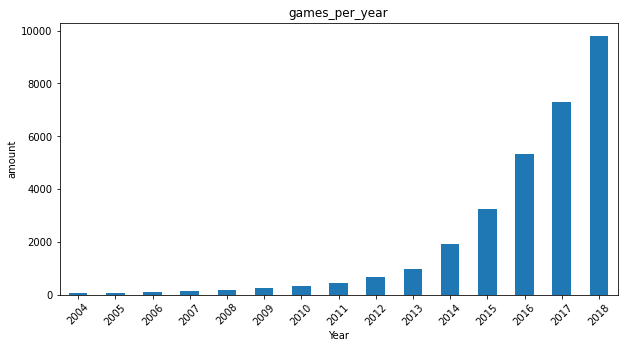

In [ ]:
game_per_year_graph = Steam_df["release_year"].value_counts().sort_index().plot(rot = 45, title = "games_per_year", xlabel = "Year", ylabel= "amount", kind = "bar", figsize= (10,5))
game_per_year_graph.set_xlim(22.5,37.5) # don't know how to figure out this problem, I will ask some one in the future.

Great! Now we have a graph represent the amount of game released on steam per year. Also, from this graph, I noticed a trend, and this is the first feature we noticed:

### $\color{66ccff}{\text{Feature 1: There are more and more new games are published on steam every year. }}$

Then let's see what is the most popular game genre on Steam:

<AxesSubplot:title={'center':'Game Genres'}>

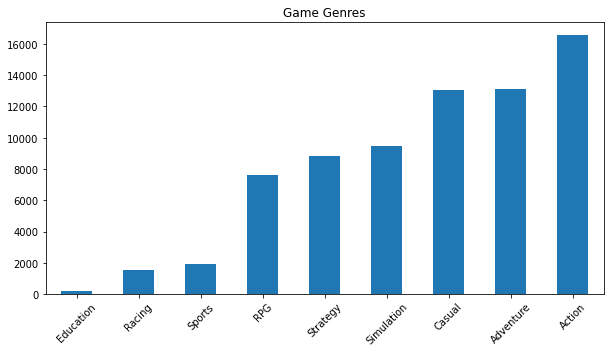

In [ ]:
Steam_df[needed_genres].sum().sort_values().plot(kind = "bar", figsize= (10,5), rot = 45, title = "Game Genres")

From the graph above, I noticed that Action game is the most popular game genre on steam. Let's see how many action games are published each year. 

(18.5, 33.5)

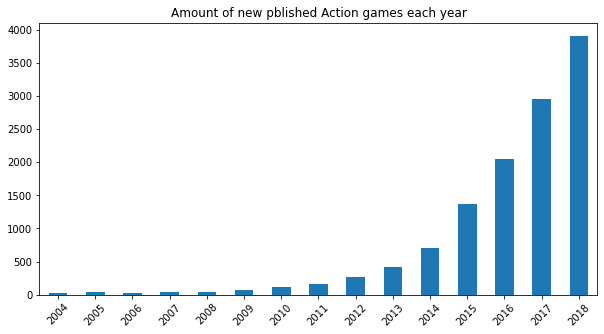

In [ ]:
Action_chart = Steam_df[Steam_df["Action"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", title= "Amount of new pblished Action games each year", figsize= (10,5))
Action_chart.set_xlim(18.5, 33.5)

In [ ]:
print(needed_genres)

['Action', 'Adventure', 'Casual', 'Education', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy']


(14.5, 29.5)

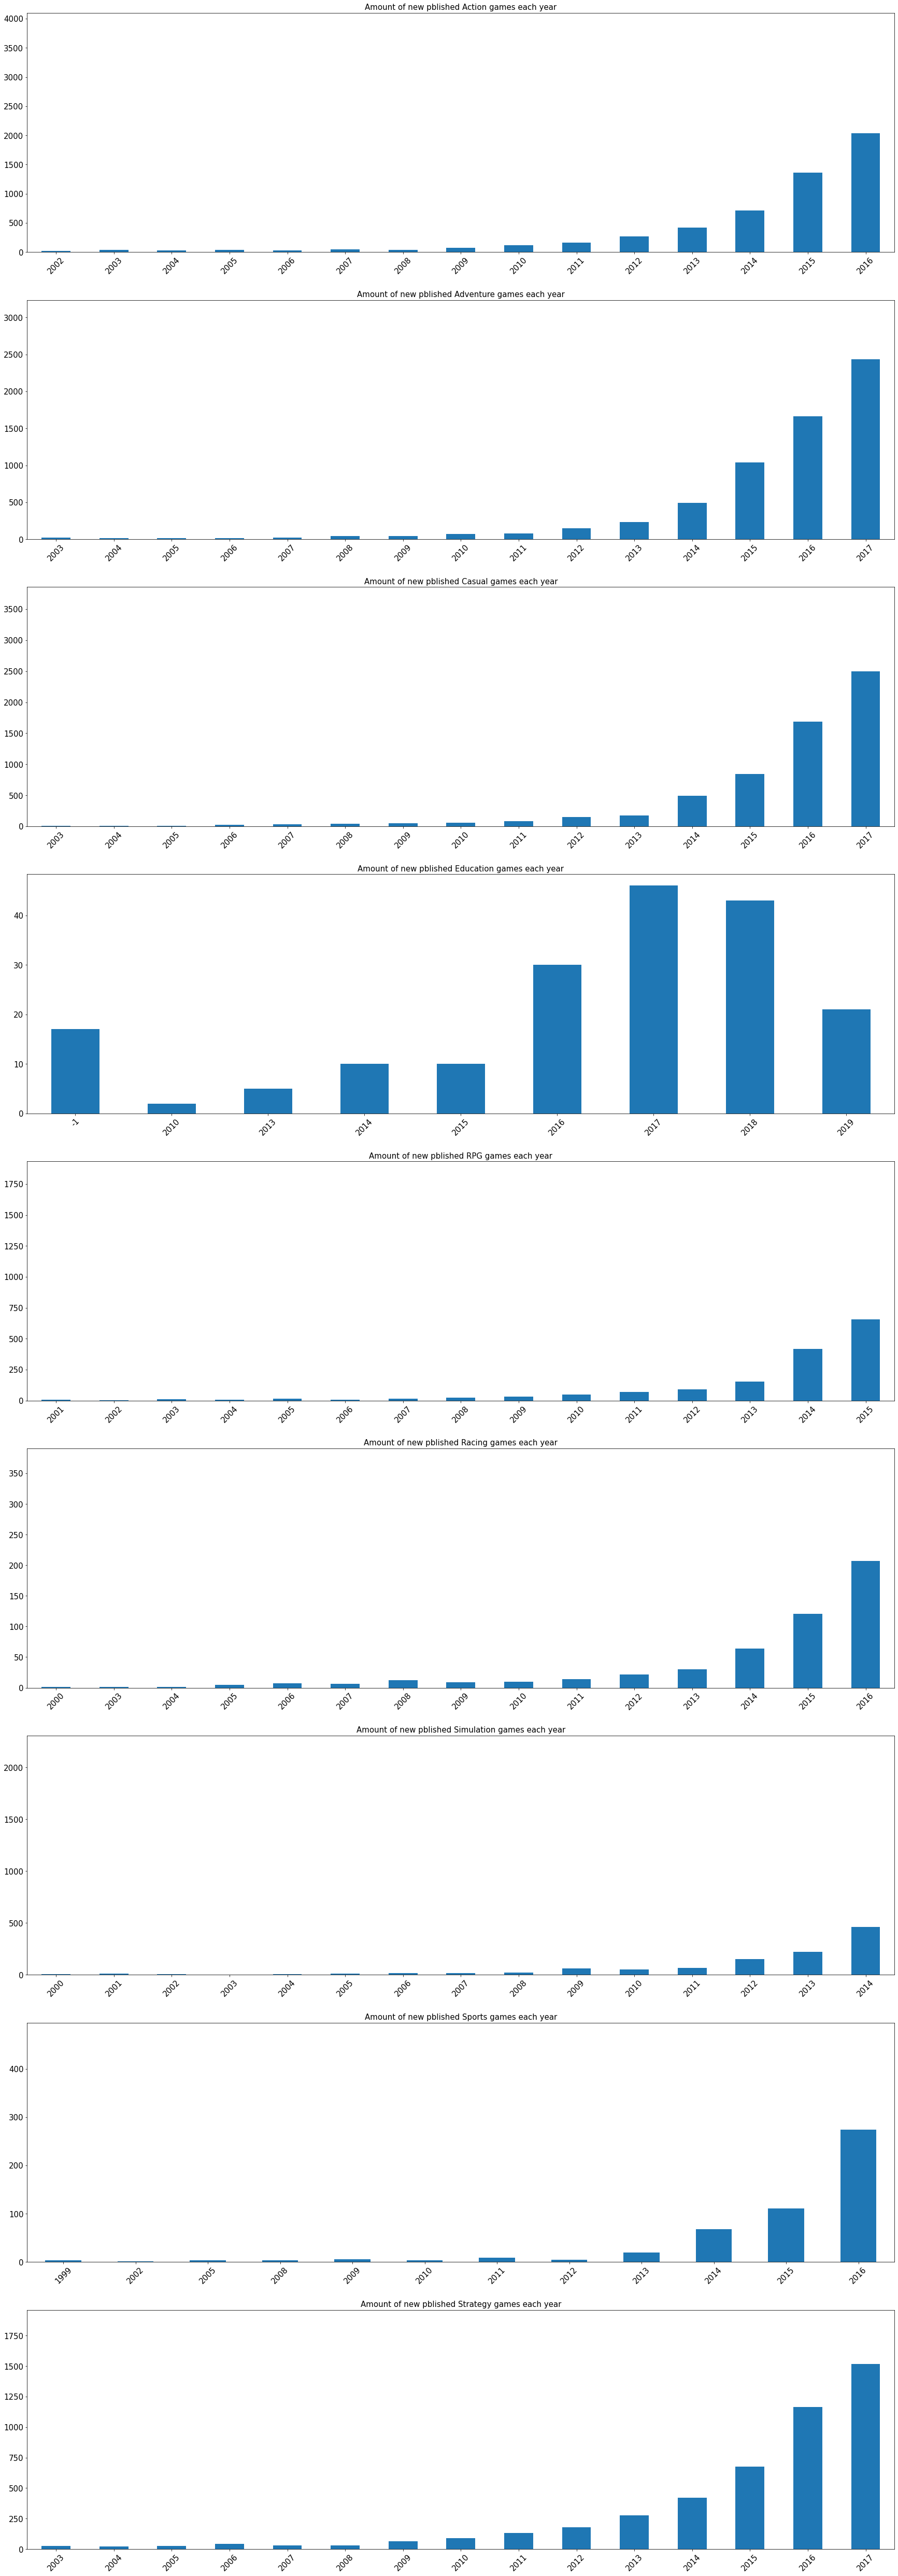

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1)

fig.set_figheight(90)
fig.set_figwidth(30)



ax1 = Steam_df[Steam_df["Action"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax1, fontsize= 15)
ax1.set_title("Amount of new pblished Action games each year", fontsize = 15)
ax1.set_xlim(16.5, 31.5)

ax2 = Steam_df[Steam_df["Adventure"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax2, fontsize= 15)
ax2.set_title("Amount of new pblished Adventure games each year", fontsize = 15)
ax2.set_xlim(19.5, 34.5)

ax3 = Steam_df[Steam_df["Casual"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax3, fontsize= 15)
ax3.set_title("Amount of new pblished Casual games each year", fontsize = 15)
ax3.set_xlim(15.5, 30.5)

ax4 = Steam_df[Steam_df["Education"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax4, fontsize= 15)
ax4.set_title("Amount of new pblished Education games each year", fontsize = 15)

ax5 = Steam_df[Steam_df["RPG"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax5, fontsize= 15)
ax5.set_title("Amount of new pblished RPG games each year", fontsize = 15)
ax5.set_xlim(14.5, 29.5)

ax6 = Steam_df[Steam_df["Racing"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax6, fontsize= 15)
ax6.set_title("Amount of new pblished Racing games each year", fontsize = 15)
ax6.set_xlim(6.5, 21.5)

ax7 = Steam_df[Steam_df["Simulation"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax7, fontsize= 15)
ax7.set_title("Amount of new pblished Simulation games each year", fontsize = 15)
ax7.set_xlim(15.5, 30.5)

ax8 = Steam_df[Steam_df["Sports"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax =ax8, fontsize= 15)
ax8.set_title("Amount of new pblished Sports games each year", fontsize = 15)
ax8.set_xlim(1.5, 13.5)

ax9 = Steam_df[Steam_df["Strategy"] == True]["release_year"].value_counts().sort_index().plot(rot = 45, kind = "bar", ax = ax9, fontsize= 15)
ax9.set_title("Amount of new pblished Strategy games each year", fontsize = 15)
ax9.set_xlim(14.5, 29.5)

It looks like most games share the same trend as the amount of games published on steam per year. 
So now, we can get our second feature: 

### $\color{66ccff}{\text{Feature 2: Action game is the most popular game genre on Steam, and most of game genres share the same trend as the amount fo games published on steam}}$

Thirdly, Let's see the reviews on steam.

<AxesSubplot:>

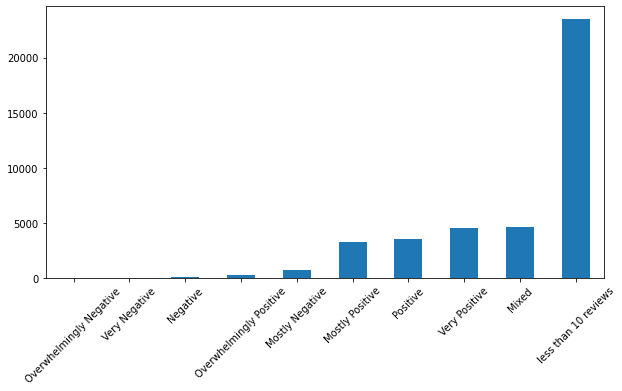

In [ ]:
Steam_df["reviews"].value_counts().sort_values().plot(kind= "bar", figsize=(10,5), rot = 45)

In [ ]:
Steam_df["reviews"].value_counts()

less than 10 reviews       23470
Mixed                       4680
Very Positive               4539
Positive                    3551
Mostly Positive             3311
Mostly Negative              782
Overwhelmingly Positive      321
Negative                     135
Very Negative                 37
Overwhelmingly Negative        7
Name: reviews, dtype: int64

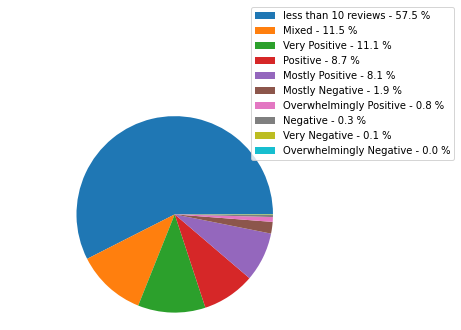

In [ ]:
percents = Steam_df["reviews"].value_counts().to_numpy() * 100 / Steam_df["reviews"].value_counts().to_numpy().sum()
label = ['%s - %1.1f %%' % (l, s) for l, s in zip(Steam_df["reviews"].value_counts().keys().values,percents)]
pie = plt.pie(Steam_df["reviews"].value_counts(), radius = 4)
plt.axis('equal')
plt.ylabel("")
plt.legend(loc = 'right', labels=label, bbox_to_anchor=(1.35,1.1))
plt.show()

Wow, more than 20000 games on steam have less than 10 reviews. It looks like make money though steam is not a good idea for individuals, unless they are sure that their game will become popular after publishing. And we just found the third feature of this dataset.

### $\color{66ccff}{\text{Feature 3: More than half of games on Steam have less than 10 reviews}}$

The next step we want to do is create a model, For this model, we will use the game genres, release year and price to predict the review of the game. 

In [ ]:
df_prediction = Steam_df
df_prediction.dropna(inplace=True)
df_prediction

,name,release_date,release_year,reviews,reviews_in_num,original_price,genre,Action,Adventure,Casual,Education,RPG,Racing,Simulation,Sports,Strategy
0,DOOM,2016-05-12,2016,Very Positive,8.0,19.99,Action,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,2017,Mixed,5.0,29.99,"Action,Adventure,Massively Multiplayer",1,1,0,0,0,0,0,0,0
2,BATTLETECH,2018-04-24,2018,Mostly Positive,6.0,39.99,"Action,Adventure,Strategy",1,1,0,0,0,0,0,0,1
3,DayZ,2018-12-13,2018,Mixed,5.0,44.99,"Action,Adventure,Massively Multiplayer",1,1,0,0,0,0,0,0,0
4,EVE Online,2003-05-06,2003,Mostly Positive,6.0,0,"Action,Free to Play,Massively Multiplayer,RPG,...",1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40557,Grabity,2018-05-30,2018,Positive,7.0,0,"Action,Indie",1,0,0,0,0,0,0,0,0
40598,Detached: Non-VR Edition,2018-07-24,2018,Mostly Positive,6.0,14.99,"Indie,Simulation",0,0,0,0,0,0,1,0,0
40611,A Room Beyond,2017-06-13,2017,Positive,7.0,7.99,"Adventure,Indie",0,1,0,0,0,0,0,0,0
40728,Chasing the Stars,2019-01-23,2019,Mostly Positive,6.0,9.99,Indie,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
feature = ["original_price", "release_year", "Action", "Adventure", "Casual", "Education", "RPG", "Racing", "Simulation", "Sports", "Strategy"]

X_train = df_prediction[feature]
y_train = df_prediction["reviews_in_num"]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train_sc, y_train)

X_new = pd.DataFrame()
X_new["original_price"] = [15]
X_new["release_year"] = [2007]
X_new["Action"] = True
X_new['Adventure'] = False
X_new['Casual'] = False
X_new['Education'] = False
X_new['RPG'] = False
X_new['Racing'] = False
X_new['Simulation'] = True
X_new['Sports'] = False
X_new['Strategy'] = False
x_new_sc = scaler.transform(X_new)


model.predict(x_new_sc)

array([5.])

### Conclusion
The prediction model shows that action games can get high scores with many game genres, but they get much lower scores with education games. Therefore, we can assume that the reason for the significant increase in the number of action games is that action games can easily be paired with other types of games, which makes the game more playable and the effect of the pairing tends to make the game score higher. The reason for the low number of educational games is that game makers believe that these games are not popular with the mainstream gaming community. We conclude that the change in the number of educational games supports our view. After a brief rise in the number of educational games there was a downward trend.

We summarize several conjectures about the reasons for the significant increase in the number of games. First of all the overall gaming environment has changed dramatically under the influence of Covid. People had a lot of time to stay at home during the epidemic. The reduction in recreational activities will make people more inclined to online entertainment. As a result more producers as well as players flocked to the video game industry during this period, allowing the overall number of games to increase. The second thing is the development of development tools. The development of game engines never stops and the tools used by developers become more and more convenient, so game developers don't need to invest a lot of time to learn how to make games. For example, the development of 3D engines roughly simulates real-world physics collisions. And character modeling can be downloaded for a fee from a number of websites. Small cost game production can build a general world view and framework, and other game kernels, character modeling, and sound effects can be directly used from existing online resources. Therefore, the number of games produced and the convenience of development tools have a certain connection.